<a href="https://colab.research.google.com/github/victorbahlangene/fastai-fastbook22/blob/main/Spaceship_Titanic_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

In [7]:
# to use kaggle api #
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# kaggle API creds #
creds = '{"username":"victorbahlangene","key":"2cd1abe2f1c35ea3060e6a2f18a055ea"}'

In [9]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [10]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -q fastkaggle

from fastkaggle import *

In [11]:
comp = 'spaceship-titanic'
path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

from fastai.tabular.all import *
set_seed(42)

In [12]:
path

Path('spaceship-titanic')

# data

In [13]:
path.ls()

(#3) [Path('spaceship-titanic/train.csv'),Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv')]

In [14]:
df = pd.read_csv(path/"train.csv")
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
df.describe(include=(object))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [17]:
df.describe(include=(object)).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [18]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [19]:
df.describe().columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

## Data cols

**PassengerId**

In [20]:
#split column A into two columns: column A and column B
df[['Passenger_Gp', 'Passenger_Gp_Nb']] = df['PassengerId'].str.split('_', 1, expand=True)

In [21]:
df[['Passenger_Gp', 'Passenger_Gp_Nb']].head()

,Passenger_Gp,Passenger_Gp_Nb
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01


number of unique elements, show unique elements, value of each unique element

In [22]:
df["Passenger_Gp"].nunique(), df["Passenger_Gp"].unique(), df["Passenger_Gp"].value_counts()

(6217,
 array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object),
 4498    8
 8168    8
 8728    8
 8796    8
 8956    8
        ..
 3483    1
 3480    1
 3478    1
 3473    1
 4620    1
 Name: Passenger_Gp, Length: 6217, dtype: int64)

In [23]:
df["Passenger_Gp_Nb"].nunique(), df["Passenger_Gp_Nb"].unique(), df["Passenger_Gp_Nb"].value_counts()

(8,
 array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object),
 01    6217
 02    1412
 03     571
 04     231
 05     128
 06      75
 07      46
 08      13
 Name: Passenger_Gp_Nb, dtype: int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  Passenger_Gp     8693 non-null   object 
 15  Passenger_Gp_Nb  8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


**HomePlanet**

In [25]:
df["HomePlanet"].head()

0    Europa
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

In [26]:
df["HomePlanet"].nunique(), df["HomePlanet"].unique(), df["HomePlanet"].value_counts()

(3, array(['Europa', 'Earth', 'Mars', nan], dtype=object), Earth     4602
 Europa    2131
 Mars      1759
 Name: HomePlanet, dtype: int64)

**CryoSleep**

In [27]:
df["CryoSleep"].head()

0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: object

In [28]:
df["CryoSleep"].nunique(), df["CryoSleep"].unique(), df["CryoSleep"].value_counts()

(2, array([False, True, nan], dtype=object), False    5439
 True     3037
 Name: CryoSleep, dtype: int64)

**Cabin**

In [29]:
df["Cabin"].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [30]:
df["Cabin"].nunique(), df["Cabin"].unique(), df["Cabin"].value_counts()

(6560,
 array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 G/734/S     8
 G/109/P     7
 B/201/P     7
 G/1368/P    7
 G/981/S     7
            ..
 G/556/P     1
 E/231/S     1
 G/545/S     1
 G/543/S     1
 F/947/P     1
 Name: Cabin, Length: 6560, dtype: int64)

In [31]:
df['Cabin'].str.split('/', 2, expand=True).head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [32]:
df['Cabin'].str.split('/', expand=True).head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [33]:
#split column A into two columns: column A and column B
df[['Cabin_Deck', 'Cabin_Num', "Cabin_Side"]] = df['Cabin'].str.split('/', expand=True)

In [34]:
df[['Cabin_Deck', 'Cabin_Num', "Cabin_Side"]].head()

,Cabin_Deck,Cabin_Num,Cabin_Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


Cabin_Deck

In [35]:
df["Cabin_Deck"].nunique(), df["Cabin_Deck"].unique(), df["Cabin_Deck"].value_counts()

(8,
 array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object),
 F    2794
 G    2559
 E     876
 B     779
 C     747
 D     478
 A     256
 T       5
 Name: Cabin_Deck, dtype: int64)

Cabin_Num

In [36]:
df["Cabin_Num"].nunique(), df["Cabin_Num"].unique(), df["Cabin_Num"].value_counts()

(1817,
 array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object),
 82      28
 86      22
 19      22
 56      21
 176     21
         ..
 1644     1
 1515     1
 1639     1
 1277     1
 1894     1
 Name: Cabin_Num, Length: 1817, dtype: int64)

Cabin_Side

In [37]:
df["Cabin_Side"].nunique(), df["Cabin_Side"].unique(), df["Cabin_Side"].value_counts()

(2, array(['P', 'S', nan], dtype=object), S    4288
 P    4206
 Name: Cabin_Side, dtype: int64)

**Destination**

In [38]:
df["Destination"].head()

0    TRAPPIST-1e
1    TRAPPIST-1e
2    TRAPPIST-1e
3    TRAPPIST-1e
4    TRAPPIST-1e
Name: Destination, dtype: object

In [39]:
df["Destination"].nunique(), df["Destination"].unique(), df["Destination"].value_counts()

(3,
 array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object),
 TRAPPIST-1e      5915
 55 Cancri e      1800
 PSO J318.5-22     796
 Name: Destination, dtype: int64)

**VIP**

In [40]:
df["VIP"].head()

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

In [41]:
df["VIP"].nunique(), df["VIP"].unique(), df["VIP"].value_counts()

(2, array([False, True, nan], dtype=object), False    8291
 True      199
 Name: VIP, dtype: int64)

**Name**

In [42]:
df["Name"].head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

In [43]:
df["Name"].nunique(), df["Name"].unique(), df["Name"].value_counts()

(8473, array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
        'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
       dtype=object), Gollux Reedall        2
 Elaney Webstephrey    2
 Grake Porki           2
 Sus Coolez            2
 Apix Wala             2
                      ..
 Jamela Griffy         1
 Hardy Griffy          1
 Salley Mckinn         1
 Mall Frasp            1
 Propsh Hontichre      1
 Name: Name, Length: 8473, dtype: int64)

In [44]:
df.describe().columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [45]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


**Function to change df**

In [46]:
def df_changes(df):
  df[['Passenger_Gp', 'Passenger_Gp_Nb']] = df['PassengerId'].str.split('_', 1, expand=True)
  df[['Cabin_Deck', 'Cabin_Num', "Cabin_Side"]] = df['Cabin'].str.split('/', expand=True)
  

In [47]:
path.ls()

(#3) [Path('spaceship-titanic/train.csv'),Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv')]

format test data like training data

In [48]:
tst_df = pd.read_csv(path/"test.csv")

In [49]:
df_changes(tst_df)

In [50]:
tst_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5,S


## TabularPandas

In [51]:
procs = [Categorify, FillMissing, Normalize]

In [52]:
dep_var = "Transported"

In [53]:
cont_names,cat_names = cont_cat_split(df, dep_var=dep_var)

In [54]:
cont_names

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [55]:
cat_names

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Passenger_Gp',
 'Passenger_Gp_Nb',
 'Cabin_Deck',
 'Cabin_Num',
 'Cabin_Side']

In [56]:
splits = RandomSplitter()(df)

In [57]:
splits

((#6955) [8388,1917,5173,8246,61,7701,6553,2494,8639,2009...],
 (#1738) [6585,7020,3039,2327,1294,1180,5618,4867,3783,6438...])

In [58]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                y_names=dep_var, y_block=CategoryBlock(), splits=splits)

In [59]:
to.show(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8388,8966_01,Mars,False,F/1735/S,TRAPPIST-1e,False,Dow Bush,8966,01,F,1735,S,False,False,False,False,False,False,52.0,1231.0,2.0,8.0,0.0,0.0,False
1917,2055_03,Earth,True,G/330/P,TRAPPIST-1e,False,#na#,2055,03,G,330,P,False,False,False,False,False,False,25.0,0.0,0.0,0.0,0.0,0.0,True
5173,5523_01,Earth,False,G/885/P,PSO J318.5-22,False,Rician Pearsalason,5523,01,G,885,P,False,False,False,False,False,False,29.0,0.0,0.0,20.0,0.0,402.0,False
8246,8811_01,Earth,False,E/577/S,PSO J318.5-22,False,Karley Goods,8811,01,E,577,S,False,False,False,False,False,False,63.0,0.0,0.0,80.0,0.0,2322.0,False
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,False,Ninaha Leeves,0067,01,G,10,S,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,True


Underlying numerical values of the TabularPandas object

In [60]:
to.items

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na
8388,8389,3,1,3242,3,1.612332,1,1.470626,-0.282769,-0.267182,...,1,6,786,2,1,1,1,1,1,1
1917,1918,1,2,5560,3,-0.265485,1,-0.327109,-0.284032,-0.280746,...,3,7,1078,1,1,1,1,1,1,1
5173,5174,1,1,6379,2,0.012710,1,-0.327109,-0.284032,-0.246835,...,1,7,1692,1,1,1,1,1,1,1
8246,8247,1,1,2091,2,2.377369,1,-0.327109,-0.284032,-0.145103,...,1,5,1351,2,1,1,1,1,1,1
61,62,1,2,4563,2,-2.004205,1,-0.327109,-0.284032,-0.280746,...,1,7,3,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,965,1,1,3444,3,-0.613229,1,0.781324,-0.284032,-0.101019,...,1,6,945,1,1,1,1,1,1,1
1395,1396,1,2,5405,3,-0.126388,1,-0.327109,-0.284032,-0.280746,...,1,7,960,2,2,1,2,1,1,1
3518,3519,3,2,4143,3,0.916844,1,-0.327109,-0.284032,-0.280746,...,1,6,1501,2,1,1,1,1,1,1
3153,3154,1,1,5893,2,0.569100,1,0.122690,-0.261929,0.422905,...,1,7,1328,1,1,1,1,1,1,1


create dataloaders

In [61]:
dls = to.dataloaders(path=".")

In [62]:
dls.show_batch()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,3353_04,Europa,False,C/125/S,TRAPPIST-1e,False,Almelik Conable,3353,04,C,125,S,False,False,False,False,False,False,61.0,0.000007,4.082000e+03,-9.350697e-07,265.000000,200.999998,True
1,6774_02,Earth,True,G/1100/P,TRAPPIST-1e,False,Donnie Steinardson,6774,02,G,1100,P,False,False,False,False,False,False,6.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,False
2,2136_01,Earth,False,G/343/S,TRAPPIST-1e,False,Sallie Waltonnedy,2136,01,G,343,S,False,False,False,False,False,False,61.0,2.000010,6.166338e-07,1.699999e+01,868.000015,28.000002,False
3,4437_01,Earth,True,G/725/S,TRAPPIST-1e,False,Idacey Cartz,4437,01,G,725,S,False,False,False,False,False,False,20.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
4,6365_01,Europa,False,A/64/P,55 Cancri e,False,Atino Glogry,6365,01,A,64,P,False,False,False,False,False,False,33.0,0.000007,3.799999e+01,-9.350697e-07,0.999992,3167.000190,False
5,5823_01,Earth,True,G/944/S,55 Cancri e,False,Ronna Antoshipson,5823,01,G,944,S,False,False,False,False,False,False,18.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
6,4981_02,Earth,#na#,G/814/S,PSO J318.5-22,False,Millia Connon,4981,02,G,814,S,False,False,False,False,False,False,29.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
7,6447_01,Earth,True,G/1043/P,PSO J318.5-22,False,#na#,6447,01,G,1043,P,False,False,False,False,False,False,38.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
8,1267_01,Earth,True,G/191/S,PSO J318.5-22,#na#,Hencey Jacostaffey,1267,01,G,191,S,False,False,False,False,False,False,34.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
9,3061_01,Earth,False,F/638/P,TRAPPIST-1e,False,Mela Bakericks,3061,01,F,638,P,False,False,False,False,False,False,22.0,663.999976,6.166338e-07,-9.350697e-07,65.000001,-0.000008,False


# model 1
**Neural network**

In [63]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

In [ ]:
learn.model

Finding learning rate

SuggestedLRs(slide=0.05754399299621582, valley=0.010964781977236271)

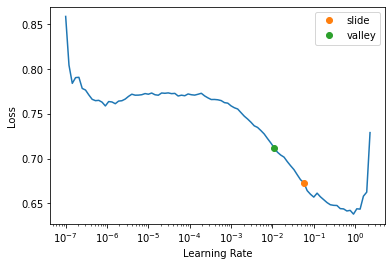

In [65]:
learn.lr_find(suggest_funcs=(slide,valley))

In [66]:
## using valley = 0.01

In [69]:
learn.fit(16,lr=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.479183,0.455043,0.784235,00:02
1,0.125479,0.555854,0.744534,00:01
2,0.037001,0.734764,0.763521,00:01
3,0.014481,0.840886,0.761220,00:01
4,0.011435,0.818921,0.776179,00:01
5,0.014699,0.847885,0.764097,00:01
6,0.019367,0.786245,0.777330,00:01
7,0.016432,0.814884,0.767549,00:01
8,0.025152,0.700596,0.771001,00:01
9,0.022920,0.652980,0.784235,00:01


## submit 1

In [70]:
path.ls()

(#3) [Path('spaceship-titanic/train.csv'),Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv')]

In [71]:
ss = pd.read_csv(path/'sample_submission.csv')
ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [72]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,02,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,01,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,01,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,01,D,297,P


In [73]:
tst_dl = learn.dls.test_dl(tst_df)
tst_dl.show_batch()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,#na#,Earth,True,#na#,TRAPPIST-1e,False,#na#,#na#,01,G,3,S,False,False,False,False,False,False,27.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
1,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,#na#,01,F,4,S,False,False,False,False,False,False,19.0,0.000007,9.000001e+00,-9.350697e-07,2822.999999,-0.000008
2,#na#,Europa,True,#na#,55 Cancri e,False,#na#,#na#,01,C,0,S,False,False,False,False,False,False,31.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
3,#na#,Europa,False,#na#,TRAPPIST-1e,False,#na#,#na#,01,C,1,S,False,False,False,False,False,False,38.0,0.000007,6.652000e+03,-9.350697e-07,181.000000,584.999989
4,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,#na#,01,F,5,S,False,False,False,False,False,False,20.0,10.000000,6.166338e-07,6.350000e+02,0.000010,-0.000008
5,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,#na#,01,F,7,P,False,False,False,False,False,False,31.0,0.000007,1.615000e+03,2.630000e+02,113.000003,59.999994
6,#na#,Europa,True,#na#,55 Cancri e,False,#na#,#na#,01,B,2,P,False,False,True,False,False,False,21.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
7,#na#,Europa,True,#na#,TRAPPIST-1e,False,#na#,#na#,01,D,0,S,False,False,False,False,False,False,20.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
8,#na#,Europa,True,#na#,55 Cancri e,False,#na#,#na#,02,D,0,S,False,False,False,False,False,False,23.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
9,#na#,Earth,False,#na#,55 Cancri e,False,#na#,#na#,01,F,7,S,False,False,False,False,False,False,24.0,0.000007,6.390000e+02,-9.350697e-07,0.000010,-0.000008


In [74]:
preds_nn,_ = learn.get_preds(dl=tst_dl)

In [75]:
tst_dl.vocab

[False, True]

In [77]:
preds_nn

tensor([[1.0150e-03, 9.9898e-01],
        [9.9956e-01, 4.4140e-04],
        [2.0124e-05, 9.9998e-01],
        ...,
        [8.0959e-05, 9.9992e-01],
        [5.6265e-01, 4.3735e-01],
        [7.0089e-04, 9.9930e-01]])

In [78]:
preds_nn.shape

torch.Size([4277, 2])

In [79]:
preds_nn[:10,1]

tensor([9.9898e-01, 4.4140e-04, 9.9998e-01, 9.9983e-01, 3.6918e-02, 3.3261e-03,
        9.9997e-01, 9.9997e-01, 9.9998e-01, 2.9127e-02])

In [80]:
preds_nn[:10,1]>0.5

tensor([ True, False,  True,  True, False, False,  True,  True,  True, False])

In [ ]:
ss.shape

(4277, 2)

In [ ]:
tst_df.shape

(4277, 13)

In [ ]:
ss.columns

Index(['PassengerId', 'Transported'], dtype='object')

Save `preds` as .csv file

In [ ]:
tst_df['Transported'] = (preds_nn[:,1]>0.5)
sub_df = tst_df[['PassengerId', 'Transported']]
sub_df.to_csv('sub2.csv', index=False)

In [ ]:
!head sub2.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True


### to kaggle

In [ ]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub2.csv', 'initial basic model', comp)

100%|██████████| 56.2k/56.2k [00:02<00:00, 25.5kB/s]


### notebook to kaggle

In [ ]:
push_notebook??

In [37]:
if not iskaggle:
    push_notebook('victorbahlangene', 'spaceship-titanic',
                  title='Spaceship Titanic 2',
                  file='Spaceship Titanic 2.ipynb',
                  competition=comp, private=False, gpu=True)

# Model 2

**Ensembling neral net**

In [39]:
def ensemble():
    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])
    with learn.no_bar(),learn.no_logging(): learn.fit(16, lr=0.03375)
    return learn.get_preds(dl=tst_dl)[0]

In [ ]:
learns = [ensemble() for _ in range(5)]

In [ ]:
learns

[tensor([[2.4408e-04, 9.9976e-01],
         [9.9906e-01, 9.3652e-04],
         [6.6273e-06, 9.9999e-01],
         ...,
         [4.2728e-05, 9.9996e-01],
         [1.8366e-02, 9.8163e-01],
         [1.9087e-04, 9.9981e-01]]), tensor([[3.4430e-03, 9.9656e-01],
         [9.9976e-01, 2.4148e-04],
         [2.5961e-05, 9.9997e-01],
         ...,
         [7.4545e-05, 9.9993e-01],
         [1.1442e-01, 8.8558e-01],
         [4.1492e-02, 9.5851e-01]]), tensor([[1.0643e-01, 8.9357e-01],
         [9.9988e-01, 1.1705e-04],
         [8.0756e-05, 9.9992e-01],
         ...,
         [8.6736e-04, 9.9913e-01],
         [6.2360e-02, 9.3764e-01],
         [3.4768e-01, 6.5232e-01]]), tensor([[2.7905e-02, 9.7210e-01],
         [9.9955e-01, 4.5101e-04],
         [1.8454e-05, 9.9998e-01],
         ...,
         [1.8404e-03, 9.9816e-01],
         [8.4865e-01, 1.5135e-01],
         [4.4781e-01, 5.5219e-01]]), tensor([[2.0645e-01, 7.9355e-01],
         [9.9997e-01, 3.3482e-05],
         [3.0659e-05, 9.9997e-

In [ ]:
torch.stack(learns)

tensor([[[2.4408e-04, 9.9976e-01],
         [9.9906e-01, 9.3652e-04],
         [6.6273e-06, 9.9999e-01],
         ...,
         [4.2728e-05, 9.9996e-01],
         [1.8366e-02, 9.8163e-01],
         [1.9087e-04, 9.9981e-01]],

        [[3.4430e-03, 9.9656e-01],
         [9.9976e-01, 2.4148e-04],
         [2.5961e-05, 9.9997e-01],
         ...,
         [7.4545e-05, 9.9993e-01],
         [1.1442e-01, 8.8558e-01],
         [4.1492e-02, 9.5851e-01]],

        [[1.0643e-01, 8.9357e-01],
         [9.9988e-01, 1.1705e-04],
         [8.0756e-05, 9.9992e-01],
         ...,
         [8.6736e-04, 9.9913e-01],
         [6.2360e-02, 9.3764e-01],
         [3.4768e-01, 6.5232e-01]],

        [[2.7905e-02, 9.7210e-01],
         [9.9955e-01, 4.5101e-04],
         [1.8454e-05, 9.9998e-01],
         ...,
         [1.8404e-03, 9.9816e-01],
         [8.4865e-01, 1.5135e-01],
         [4.4781e-01, 5.5219e-01]],

        [[2.0645e-01, 7.9355e-01],
         [9.9997e-01, 3.3482e-05],
         [3.0659e-05, 9.99

In [ ]:
torch.stack(learns).mean(0)

tensor([[6.8893e-02, 9.3111e-01],
        [9.9964e-01, 3.5591e-04],
        [3.2491e-05, 9.9997e-01],
        ...,
        [7.2756e-04, 9.9927e-01],
        [4.0871e-01, 5.9129e-01],
        [3.6074e-01, 6.3926e-01]])

In [ ]:
ens_preds = torch.stack(learns).mean(0)

In [ ]:
ens_preds

tensor([[6.8893e-02, 9.3111e-01],
        [9.9964e-01, 3.5591e-04],
        [3.2491e-05, 9.9997e-01],
        ...,
        [7.2756e-04, 9.9927e-01],
        [4.0871e-01, 5.9129e-01],
        [3.6074e-01, 6.3926e-01]])

## submit 2

In [ ]:
tst_df['Transported'] = (ens_preds[:,1]>0.5)
sub_df = tst_df[['PassengerId', 'Transported']]
sub_df.to_csv('sub3.csv', index=False)

In [ ]:
!head sub3.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [ ]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub3.csv', 'Ensemble model', comp)

100%|██████████| 56.8k/56.8k [00:04<00:00, 13.4kB/s]


# model 3
**Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
from sklearn.metrics import accuracy_score

**train test split**

In [86]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [87]:
xs.shape,y.shape 

((6955, 24), (6955,))

In [88]:
valid_xs.shape,valid_y.shape

((1738, 24), (1738,))

**RandomForestClassifier Function**

In [89]:
def rfc(xs, y, n_estimators=100, min_samples_leaf=4, **kwargs):
  return RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf).fit(xs, y)

In [90]:
def acc(m, valid_xs, valid_y):
  return accuracy_score(valid_y, m.predict(valid_xs))

In [91]:
rfc_model = rfc(xs, y, n_estimators=100, min_samples_leaf=5)

In [92]:
accuracy = acc(rfc_model, valid_xs, valid_y)
accuracy

0.7986191024165707

# NB: Make Predictions from Random Forest

```python
rf_preds = m.predict(valid_xs_time)
```

In [38]:
tst_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,S


test TabulaPandas obj

In [94]:
test_to = TabularPandas(tst_df, procs=procs, cat_names=cat_names, cont_names=cont_names)

In [95]:
test_to.show(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning,0013,01,G,3,S,False,False,False,False,False,False,27.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers,0018,01,F,4,S,False,False,False,False,False,False,19.0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus,0019,01,C,0,S,False,False,False,False,False,False,31.0,0.0,0.0,0.0,0.0,0.0


In [96]:
test_to.xs[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,...,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,2,2785,3,1,2913,1,1,7,...,1,1,1,1,-0.114147,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
1,2,1,1,1868,3,1,2407,2,1,6,...,1,1,1,1,-0.684313,-0.357339,-0.277879,-0.312173,2.287504,-0.246712
2,3,2,2,258,1,1,3377,3,1,3,...,1,1,1,1,0.170937,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712


In [97]:
valid_xs[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,...,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
6585,6586,1,1,1938,1,1,5054,4677,1,5,...,1,1,1,1,-0.265485,-0.327109,-0.276454,1.162162,-0.251768,-0.169989
7020,7021,3,2,2975,3,1,6383,5024,1,6,...,1,1,1,1,0.986393,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122
3039,3040,1,1,5838,2,1,4281,2201,1,7,...,1,1,1,1,-1.865107,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122


In [98]:
type(test_to.xs), type(valid_xs)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [99]:
# make test df more readable #
test_xs = test_to.xs

In [46]:
rfc_model.predict(test_xs)

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [100]:
rfc_model_predictions = rfc_model.predict(test_xs)

In [101]:
rfc_model_predictions.shape

(4277,)

In [80]:
len(rfc_model_predictions)

4277

## submit 3

In [51]:
tst_df.shape

(4277, 18)

In [50]:
tst_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S


In [53]:
path.ls()

(#3) [Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv'),Path('spaceship-titanic/train.csv')]

In [54]:
ss = pd.read_csv(path/"sample_submission.csv")
ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [55]:
rfc_model_predictions.dtype

dtype('int8')

In [81]:
tst_df['Transported'] = rfc_model_predictions
sub_df = tst_df[['PassengerId', 'Transported']]
# sub_df.to_csv('sub4.csv', index=False)

In [82]:
sub_df

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


Convert `Transported` col to a bool

In [ ]:
sub_df["Transported"] = sub_df["Transported"].astype(bool)

In [84]:
sub_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [85]:
sub_df.to_csv('sub4.csv', index=False)

In [86]:
!head sub4.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True


In [65]:
!head sub4.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True


In [87]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub4.csv', 'Random forest model', comp)

100%|██████████| 56.8k/56.8k [00:00<00:00, 276kB/s]


### Leaderborad = 1556 => 0.78255

# Model 4
Gridsearch random forest

In [88]:
rfc_params={
 'bootstrap': [True,False],
 'max_features': ['auto','sqrt'],
 'min_samples_leaf': [4,5,6],
 'min_samples_split': [2,5],
 'n_estimators': [100,200,300]
}

In [89]:
# Using gridsearch to find the best params for SVC #
from sklearn.model_selection import GridSearchCV

In [90]:
# creating a gridsearch with random forest classifier #
grid_rcf = GridSearchCV(RandomForestClassifier(),rfc_params,verbose=5)

In [91]:
grid_rcf.fit(xs, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.7s
[CV 2/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.790 total time=   0.8s
[CV 3/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.802 total time=   1.5s
[CV 4/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   1.1s
[CV 5/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.9s
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.808 total time=   1.5s
[CV 2/5] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

`10m34s` execution time. use less folds.(verbose=3 instead of 5)

In [92]:
grid_rcf.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 300}

In [93]:
grid_rcf.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=300)

In [95]:
grid_rcf.best_score_

0.8058950395398993

**Model**

In [100]:
rfc_model_grid = rfc(xs, y, bootstrap=False, min_samples_leaf=6, min_samples_split=5, n_estimators=300)

In [101]:
accuracy = acc(rfc_model_grid, valid_xs, valid_y)
accuracy

0.7934407364787112

In [107]:
rfc_model_grid_predictions = rfc_model_grid.predict(test_xs)

In [108]:
rfc_model_grid_predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int8)

## submit 4

In [102]:
ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [109]:
tst_df['Transported'] = rfc_model_grid_predictions
sub_df1 = tst_df[['PassengerId', 'Transported']]
# sub_df.to_csv('sub4.csv', index=False)

In [111]:
sub_df1.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [117]:
sub_df1.loc[:,"Transported"] = sub_df1["Transported"].astype(bool)

SettingWithCopyError: ignored

In [118]:
sub_df1.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [119]:
sub_df1.to_csv('sub5.csv', index=False)

In [120]:
!head sub5.csv

PassengerId,Transported
0013_01,False
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True


In [124]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub5.csv', 'Random forest model gridsearch', comp)

100%|██████████| 57.1k/57.1k [00:00<00:00, 284kB/s]


Your submission scored 0.73579.
getting worse results.

# Model 5
ensemble random forest + neural net

In [81]:
# neural network predictions #
preds_nn.shape, preds_nn

(torch.Size([4277, 2]), tensor([[1.0150e-03, 9.9898e-01],
         [9.9956e-01, 4.4140e-04],
         [2.0124e-05, 9.9998e-01],
         ...,
         [8.0959e-05, 9.9992e-01],
         [5.6265e-01, 4.3735e-01],
         [7.0089e-04, 9.9930e-01]]))

In [82]:
(preds_nn[:,1]>0.5)

tensor([ True, False,  True,  ...,  True, False,  True])

In [83]:
(preds_nn[:,1]>0.5).shape

torch.Size([4277])

In [113]:
preds_nn_final = (preds_nn[:,1]>0.5)

In [114]:
preds_nn_final

tensor([ True, False,  True,  ...,  True, False,  True])

In [116]:
preds_nn_final.shape

torch.Size([4277])

In [117]:
(preds_nn_final.squeeze()).shape

torch.Size([4277])

In [118]:
to_np(preds_nn_final.squeeze()).shape

(4277,)

In [119]:
to_np(preds_nn_final).shape

(4277,)

rfc preds

In [102]:
rfc_model_predictions.shape

(4277,)

ensemble preds

In [120]:
ens_preds = (to_np(preds_nn_final.squeeze()) + rfc_model_predictions) /2

In [122]:
ens_preds.shape

(4277,)

In [125]:
valid_y.shape

(1738,)

In [123]:
accuracy_score(valid_y, ens_preds)

ValueError: ignored

## Submit 5

In [131]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,02,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,01,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,01,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,01,D,297,P


In [132]:
tst_df['Transported'] = ens_preds
sub_df2 = tst_df[['PassengerId', 'Transported']]
# sub_df.to_csv('sub4.csv', index=False)

In [133]:
sub_df2

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,0.5
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,0.5


In [138]:
sub_df3 = sub_df2.copy()

In [139]:
sub_df3.head()

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,0.5


In [140]:
sub_df3["Transported"] = sub_df2["Transported"].astype(bool)

In [141]:
sub_df3

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [142]:
sub_df3.to_csv('sub6.csv', index=False)


In [143]:
!head sub6.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True


In [144]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub6.csv', 'Random forest neuralnet ensemble', comp)

100%|██████████| 56.4k/56.4k [00:02<00:00, 22.2kB/s]


best result so far:

### Leaderborad = 1233 => 0.79144

# Feature Importance

In [145]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

for Random Forest model

In [146]:
xs

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Passenger_Gp,Passenger_Gp_Nb,Cabin_Deck,...,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8388,8389,3,1,3242,3,1,2424,6005,1,6,...,1,1,1,1,1.612332,1.470626,-0.282769,-0.267182,-0.267988,-0.263122
1917,1918,1,2,5560,3,1,0,1362,3,7,...,1,1,1,1,-0.265485,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122
5173,5174,1,1,6379,2,1,6619,3719,1,7,...,1,1,1,1,0.012710,-0.327109,-0.284032,-0.246835,-0.267988,0.100366
8246,8247,1,1,2091,2,1,4592,5905,1,5,...,1,1,1,1,2.377369,-0.327109,-0.284032,-0.145103,-0.267988,1.836429
61,62,1,2,4563,2,1,5982,44,1,7,...,1,1,1,1,-2.004205,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,4490,3,2,4518,3,1,3321,3210,4,6,...,1,1,1,1,-1.586912,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122
2308,2309,1,1,3865,3,1,5332,1660,1,6,...,1,1,1,1,-0.195937,0.479024,-0.162781,-0.229880,-0.267988,-0.262217
6485,6486,2,2,401,1,1,6910,4608,2,2,...,1,1,1,1,0.082259,-0.327109,-0.284032,-0.280746,-0.267988,-0.263122
2770,2771,3,1,1554,3,1,7398,2004,1,5,...,1,1,1,1,-0.960973,8.013157,-0.284032,3.985243,-0.267988,0.975631


In [148]:
fi = rf_feat_importance(rfc_model, xs)
fi[:10]

,cols,imp
2,CryoSleep,0.146013
19,RoomService,0.110770
23,VRDeck,0.100498
22,Spa,0.097576
20,FoodCourt,0.079306
3,Cabin,0.075399
21,ShoppingMall,0.065379
18,Age,0.047065
10,Cabin_Num,0.046448
7,Passenger_Gp,0.041337


A plot of the feature importances shows the relative importances more clearly

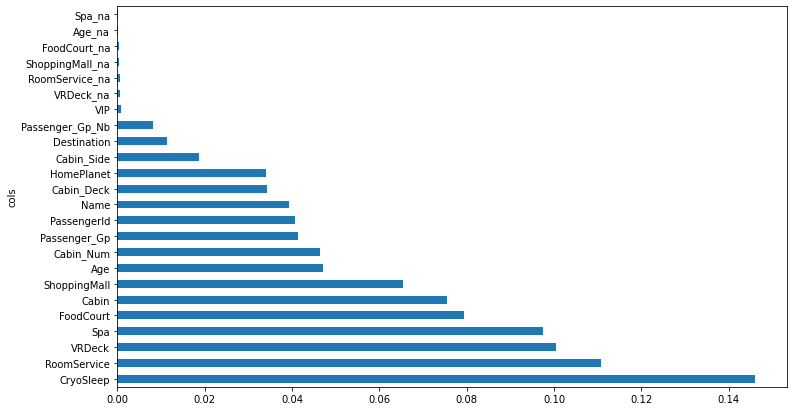

In [149]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

## Removing Low-Importance Variables

In [150]:
to_keep = fi[fi.imp>0.04].cols
len(to_keep)

11

In [151]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [152]:
rfc_model_imp = rfc(xs_imp, y, n_estimators=100, min_samples_leaf=5)

In [153]:
accuracy = acc(rfc_model_imp, valid_xs_imp, valid_y)
accuracy

0.7957422324510932

same acc. 

NB. find feature importance after the first model you make.